# Total Variation Distance Simulation

This task involves assessing the representativeness of jury panels in Alameda County, California, focusing on multiple racial and ethnic categories. The analysis uses data from the ACLU report on jury selection in 2010 and aim to determine whether the observed panels adequately represent the eligible population.

**Objective**

Evaluate the representativeness of jury panels by comparing the ethnic distribution with a simulated random sample.

**Methodology**

* Data Source: Utilising data from the ACLU report on 11 felony trials in 2009-2010.

* Metric: Introducing a novel metric, Total Variation Distance (TVD), to quantify the disparity between observed panels and a simulated random sample.

**Key Findings**
* The observed distribution of panelists significantly deviates from expectations under random selection.
* TVD simulations indicate a consistent pattern, with observed distances exceeding those expected in a random scenario.

**Link**: https://inferentialthinking.com/chapters/11/2/Multiple_Categories.html

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

### 1. Original data sample

In [4]:
# Original sample
jury = pd.DataFrame({
    'Ethnicity': ['Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'],
    'Eligible': [0.15, 0.18, 0.54, 0.12, 0.01],
    'Panels': [0.26, 0.08, 0.54, 0.08, 0.04]
    })

jury

,Ethnicity,Eligible,Panels
0,Asian/PI,0.15,0.26
1,Black/AA,0.18,0.08
2,Caucasian,0.54,0.54
3,Hispanic,0.12,0.08
4,Other,0.01,0.04


<Axes: xlabel='Percentage', ylabel='Ethnicity'>

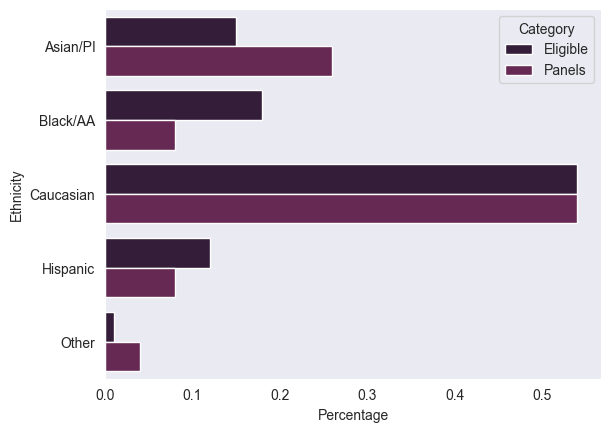

In [6]:
# Converting data to long form
melted_jury = pd.melt(jury, id_vars='Ethnicity', var_name='Category', value_name='Percentage')

# Plot
sns.set_style('dark')
sns.set_palette('rocket')
sns.barplot(x='Percentage', y='Ethnicity', hue = 'Category', data=melted_jury)

### 2. Random sample from the distribution of eligible jurors (n = 1453)

,Ethnicity,Eligible,Panels,Random sample
0,Asian/PI,0.15,0.26,0.149346
1,Black/AA,0.18,0.08,0.172058
2,Caucasian,0.54,0.54,0.556779
3,Hispanic,0.12,0.08,0.115623
4,Other,0.01,0.04,0.006194


<Axes: xlabel='Percentage', ylabel='Ethnicity'>

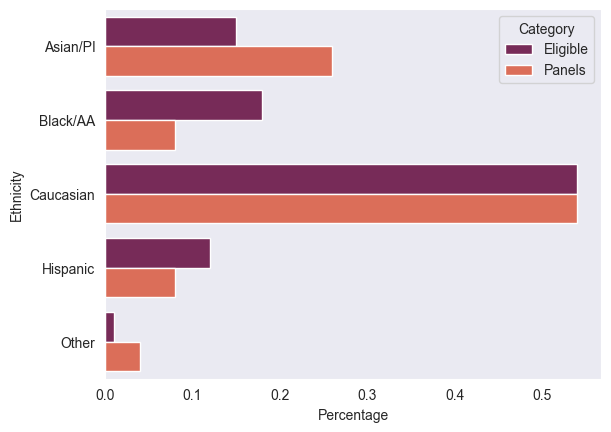

In [7]:
n = 1453

# Random sampling
random_sample = np.random.multinomial(1453, jury['Eligible']) / n
jury['Random sample'] = random_sample
display(jury)

# Plot
sns.barplot(x='Percentage', y='Ethnicity',
    hue = 'Category', palette = 'rocket',
    data = melted_jury)

*Note: sample with replacement*

The bar chart shows that the distribution of the random sample resembles the eligible population but the distribution of the panels does not.

### 3. TVD simulation 
To assess whether this observation is particular to one random sample or more general, we can simulate multiple panels under the model of random selection and see what the simulations predict. But we won’t be able to look at thousands of bar charts like the one above. We need a statistic that will help us assess whether or not the model or random selection is supported by the data -> TVD. 

> **Total Variation Distance (TVD)** is a statistical metric used to quantify the dissimilarity between two probability distributions. In the context of this analysis, it measures how different the distribution of ethnicities among eligible jurors is from the distribution observed in the jury panels.

In [8]:
# TVD - 1 simulation
def tvd (dist1, dist2):
    """ Calculate the total variation distribution of 2 distributions """
    return sum(np.abs(dist1 - dist2)) / 2

# We wanna compute the TVD between the Eligible and Panel group in the original data sample 
tvd(jury['Eligible'], jury['Panels'])

0.14

,Simulation,TVD
0,1,0.022973
1,2,0.026511
2,3,0.025203
3,4,0.026222
4,5,0.013008


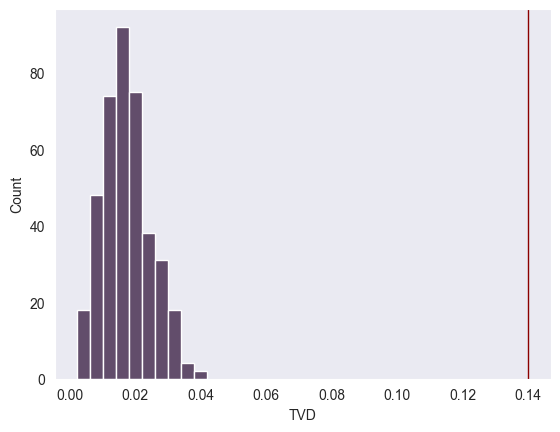

In [12]:
# TVD - n simulations

def tvd_simulation ():
    """ Generate the TVD for 2 distributions n times """
    data = [] # Dis initialisation has to be OUTSIDE of the loop 
    for i in range(1, rep + 1):
        random_sample = np.random.multinomial(1453, jury['Eligible']) / n
        tvd_result = tvd(random_sample, jury['Eligible'])
        data.append({
            'Simulation': i,
            'TVD': tvd_result
        })
    tvd_simulation_results = pd.DataFrame(data)
    return tvd_simulation_results

rep = int(input("Enter the number of simulation: "))

tvd_simulation_results = tvd_simulation()
display(tvd_simulation_results.head(5))

# Plot
sns.histplot(data = tvd_simulation_results,
    x = 'TVD',
    bins = 10)
plt.axvline(x=0.14, color='darkred', linestyle='-', linewidth=1)

The panels in the study, however, were not quite so similar to the eligible population. The total variation distance between the panels and the population was 0.14, shown by the red line on the horizontal axis. It is far beyond the tail of the histogram and does not look at all like a typical distance between the distributions of a random sample and the eligible population.

**Conclusion**: The simulation shows that the composition of the panels in the ACLU study is not consistent with the model of random selection. Our analysis supports the ACLU’s conclusion that the panels were not representative of the distribution provided for the eligible jurors.